# Лабораторная работа: кластеризация

Анастасия Максимовская, ИАД-4

## Разделение изображения на семантические компоненты

Загрузите изображение

In [63]:
from scipy.misc import imread, imshow
from PIL import Image
import time
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import sys, sklearn
import scipy as sp
from sklearn.decomposition import PCA, KernelPCA
from sklearn.cluster import KMeans
from sklearn.feature_extraction import image
from sklearn.cluster import spectral_clustering

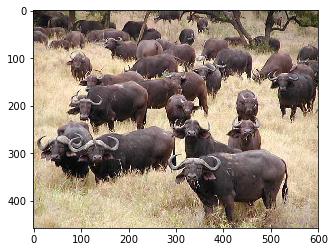

In [2]:
img1 = imread('bizon.jpg')
fig = plt.figure()
plt.imshow(img1)

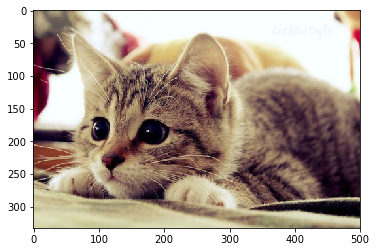

In [3]:
img2 = imread('kotyatochka.jpg')
fig = plt.figure()
plt.imshow(img2)

**1. (1 балл)** На каждом изображении, используя кластеризацию KMeans, выделите компоненты, охарактеризовав каждый пиксель следующим образом [$\lambda x_i,\lambda y_i,r_i,g_i,b_i$], где $x_i$ и $y_i$ — координаты пикселя, $r_i$,$g_i$,$b_i$ — его цвет, $\lambda$ — параметр, выражающий важность пространственной связности перед цветовой похожестью.
 
**2. (0.5 балл)** Визуализируйте результаты сегментации.

Данное задание я поняла так: для каждого пикселя вывести его координаты, умноженные на парметр $\lambda$, 3 цветовых канала. На такой матрице обучить и сделать предсказание с помощью метода KMeans. Запишем это в функцию, чтобы было удобно выполнять для обеих картинок и "играть" с параметром в заданиях 5-6.

http://qaru.site/questions/64254/how-can-i-read-the-rgb-value-of-a-given-pixel-in-python - один из вспомогательных источников

In [23]:
def add_lambda(image_path, lmbd):
    image = Image.open(image_path, 'r')
    width, height = image.size
    blank_matrix = []
    image = imread(image_path)
    for i in range(height):
        for j in range(width):
            blank_matrix.append([lmbd*i, lmbd*j, image[i][j][0], image[i][j][1], image[i][j][2]])
    kmeans = KMeans(n_clusters = 6, n_jobs=-1, random_state=1)
    kmeans.fit(blank_matrix)
    img_res = kmeans.predict(blank_matrix)
    img_res = img_res.reshape(height, width)
    plt.imshow(img_res)
    return blank_matrix

[[0.0, 0.0, 79, 55, 53],
 [0.0, 0.5, 66, 42, 40],
 [0.0, 1.0, 59, 35, 33],
 [0.0, 1.5, 60, 39, 36],
 [0.0, 2.0, 61, 40, 37],
 [0.0, 2.5, 58, 39, 35],
 [0.0, 3.0, 65, 46, 42],
 [0.0, 3.5, 76, 58, 54],
 [0.0, 4.0, 82, 67, 62],
 [0.0, 4.5, 83, 68, 63],
 [0.0, 5.0, 80, 67, 61],
 [0.0, 5.5, 73, 62, 56],
 [0.0, 6.0, 73, 62, 56],
 [0.0, 6.5, 87, 78, 71],
 [0.0, 7.0, 114, 105, 98],
 [0.0, 7.5, 136, 127, 120],
 [0.0, 8.0, 55, 46, 37],
 [0.0, 8.5, 64, 55, 46],
 [0.0, 9.0, 73, 64, 55],
 [0.0, 9.5, 73, 63, 54],
 [0.0, 10.0, 68, 58, 49],
 [0.0, 10.5, 73, 60, 52],
 [0.0, 11.0, 86, 71, 64],
 [0.0, 11.5, 98, 83, 76],
 [0.0, 12.0, 73, 56, 49],
 [0.0, 12.5, 77, 58, 52],
 [0.0, 13.0, 78, 59, 53],
 [0.0, 13.5, 78, 57, 52],
 [0.0, 14.0, 79, 58, 53],
 [0.0, 14.5, 89, 65, 61],
 [0.0, 15.0, 104, 80, 76],
 [0.0, 15.5, 116, 92, 88],
 [0.0, 16.0, 119, 95, 71],
 [0.0, 16.5, 124, 100, 76],
 [0.0, 17.0, 129, 104, 82],
 [0.0, 17.5, 128, 103, 81],
 [0.0, 18.0, 122, 97, 77],
 [0.0, 18.5, 117, 91, 74],
 [0.0, 19.0, 116

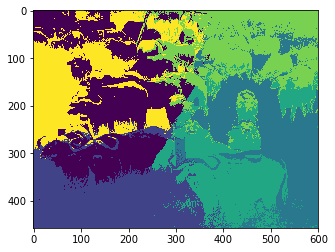

In [24]:
add_lambda('bizon.jpg', 0.5)

[[0.0, 0.0, 153, 142, 110],
 [0.0, 0.5, 157, 143, 114],
 [0.0, 1.0, 155, 141, 114],
 [0.0, 1.5, 152, 137, 114],
 [0.0, 2.0, 154, 137, 117],
 [0.0, 2.5, 160, 143, 123],
 [0.0, 3.0, 163, 147, 124],
 [0.0, 3.5, 162, 146, 121],
 [0.0, 4.0, 158, 143, 114],
 [0.0, 4.5, 159, 144, 113],
 [0.0, 5.0, 158, 143, 110],
 [0.0, 5.5, 154, 139, 108],
 [0.0, 6.0, 148, 134, 107],
 [0.0, 6.5, 142, 127, 104],
 [0.0, 7.0, 137, 122, 103],
 [0.0, 7.5, 131, 118, 101],
 [0.0, 8.0, 116, 106, 96],
 [0.0, 8.5, 109, 99, 89],
 [0.0, 9.0, 109, 99, 89],
 [0.0, 9.5, 118, 108, 98],
 [0.0, 10.0, 131, 119, 107],
 [0.0, 10.5, 138, 126, 110],
 [0.0, 11.0, 146, 135, 117],
 [0.0, 11.5, 155, 143, 119],
 [0.0, 12.0, 157, 146, 118],
 [0.0, 12.5, 162, 151, 121],
 [0.0, 13.0, 170, 157, 125],
 [0.0, 13.5, 172, 159, 127],
 [0.0, 14.0, 174, 161, 129],
 [0.0, 14.5, 176, 161, 132],
 [0.0, 15.0, 176, 160, 134],
 [0.0, 15.5, 175, 159, 133],
 [0.0, 16.0, 169, 163, 127],
 [0.0, 16.5, 172, 166, 130],
 [0.0, 17.0, 177, 169, 133],
 [0.0, 17.5

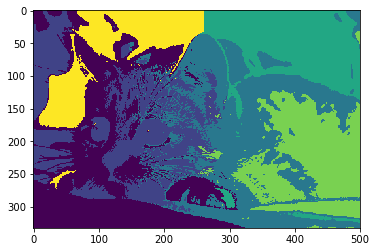

In [25]:
add_lambda('kotyatochka.jpg', 0.5)

Получилось красивое современное искусство!

**3. (1 балл)** 
Выделите сегменты при помощи [спектральной кластеризации](http://scikit-learn.org/stable/modules/clustering.html#spectral-clustering). Обратите внимание на [пример в sklearn](http://scikit-learn.org/0.16/auto_examples/cluster/plot_lena_segmentation.html). Для ускорения работы алгоритма рекомендуется привести изображение к серому цвету.
 
**4. (0.5 балл)** Визуализируйте результаты сегментации (аналогично рисунку выше).

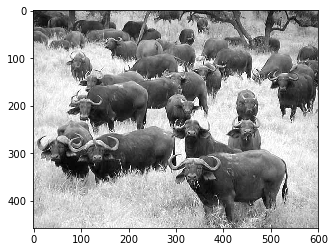

In [64]:
img1 = imread('bizon.jpg')
im1 = img1[:,:,0]
plt.imshow(im1, cmap='gray')

In [66]:
from sklearn.feature_extraction import image
graph = image.img_to_graph(im1)

In [67]:
beta = 5
eps = 1e-6
graph.data = np.exp(-beta * graph.data / im1.std()) + eps

In [68]:
N_REGIONS = 2

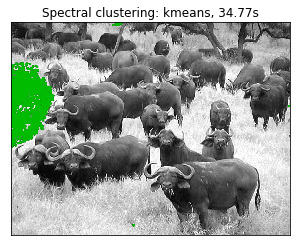

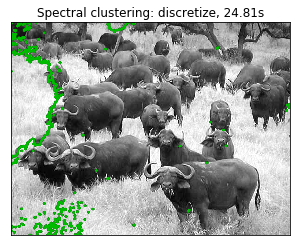

In [74]:
for assign_labels in ('kmeans', 'discretize'):
    t0 = time.time()
    labels = spectral_clustering(graph, n_clusters=N_REGIONS,
                                 assign_labels=assign_labels,
                                 eigen_solver='amg',
                                 random_state=1)
    t1 = time.time()
    labels = labels.reshape(im1.shape)

    plt.figure(figsize=(5, 5))
    plt.imshow(im1,   cmap=plt.cm.gray)
    for l in range(N_REGIONS):
        plt.contour(labels == l, contours=1,
                    colors=[plt.cm.spectral(l / float(N_REGIONS)), ])
    plt.xticks(())
    plt.yticks(())
    plt.title('Spectral clustering: %s, %.2fs' % (assign_labels, (t1 - t0)))

plt.show()

**5. (1 балл)** Поэкспериментируйте с параметрами алгоритмов и параметром $\lambda$ в признаках. Сравните два метода сегментации.

Перепишу функцию так, чтобы не выводилась матрица.

In [31]:
def add_lambda_(image_path, lmbd):
    image = Image.open(image_path, 'r')
    width, height = image.size
    blank_matrix = []
    image = imread(image_path)
    for i in range(height):
        for j in range(width):
            blank_matrix.append([lmbd*i, lmbd*j, image[i][j][0], image[i][j][1], image[i][j][2]])
    kmeans = KMeans(n_clusters = 6, n_jobs=-1, random_state=1)
    kmeans.fit(blank_matrix)
    img_res = kmeans.predict(blank_matrix)
    img_res = img_res.reshape(height, width)
    plt.imshow(img_res)

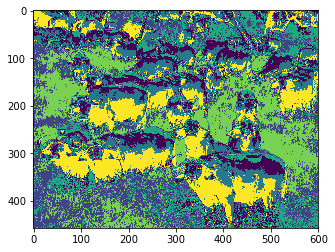

In [32]:
add_lambda_('bizon.jpg', 0.1)

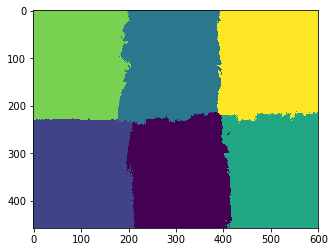

In [33]:
add_lambda_('bizon.jpg', 2)

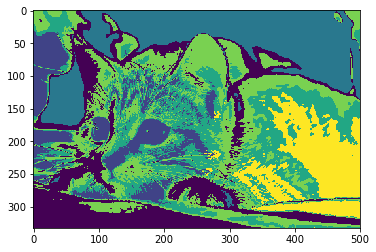

In [36]:
add_lambda_('kotyatochka.jpg', 0.3)

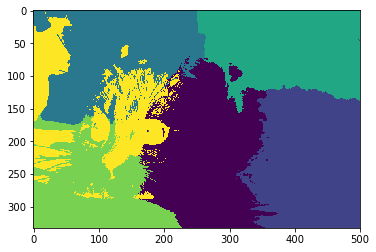

In [39]:
add_lambda_('kotyatochka.jpg', 1.5)

Параметр $\lambda$ лучше подбирать исходя из желаемого результата кластеризации. Чем он больше, тем меньше кластеров выделяется (они, соответственно, крупнее) и наоборот.

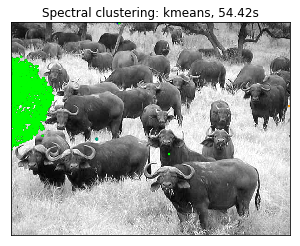

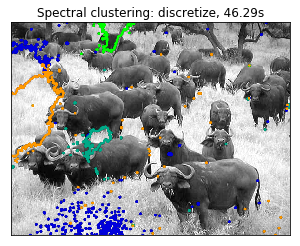

In [77]:
from sklearn.feature_extraction import image
graph = image.img_to_graph(im1)

beta = 5     
eps = 1e-6
graph.data = np.exp(-beta * graph.data / im1.std()) + eps

N_REGIONS = 5     # поменяли с 11 на 5
for assign_labels in ('kmeans', 'discretize'):
    t0 = time.time()
    labels = spectral_clustering(graph, n_clusters=N_REGIONS,
                                 assign_labels=assign_labels,
                                 eigen_solver='amg',
                                 random_state=1)
    t1 = time.time()
    labels = labels.reshape(im1.shape)

    plt.figure(figsize=(5, 5))
    plt.imshow(im1,   cmap=plt.cm.gray)
    for l in range(N_REGIONS):
        plt.contour(labels == l, contours=1,
                    colors=[plt.cm.spectral(l / float(N_REGIONS)), ])
    plt.xticks(())
    plt.yticks(())
    plt.title('Spectral clustering: %s, %.2fs' % (assign_labels, (t1 - t0)))

plt.show()

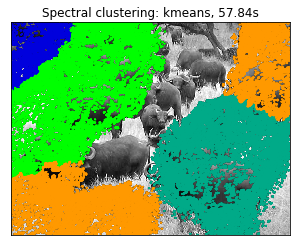

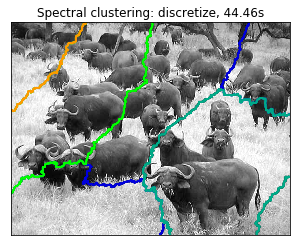

In [80]:
from sklearn.feature_extraction import image
graph = image.img_to_graph(im1)

beta = 2     
eps = 28e-8
graph.data = np.exp(-beta * graph.data / im1.std()) + eps

N_REGIONS = 5     # поменяли с 11 на 5
for assign_labels in ('kmeans', 'discretize'):
    t0 = time.time()
    labels = spectral_clustering(graph, n_clusters=N_REGIONS,
                                 assign_labels=assign_labels,
                                 eigen_solver='amg',
                                 random_state=1)
    t1 = time.time()
    labels = labels.reshape(im1.shape)

    plt.figure(figsize=(5, 5))
    plt.imshow(im1,   cmap=plt.cm.gray)
    for l in range(N_REGIONS):
        plt.contour(labels == l, contours=1,
                    colors=[plt.cm.spectral(l / float(N_REGIONS)), ])
    plt.xticks(())
    plt.yticks(())
    plt.title('Spectral clustering: %s, %.2fs' % (assign_labels, (t1 - t0)))

plt.show()

Изменение количества регионов не сильно влияет на качество кластеризации. А вот изменение параметров beta и eps сделало кластеризацию более понятной. Спектральная кластеризация лучше работает при использовании метода discretize, чем при помощи KMeans.

**6. (0.5 балл)**
Насколько хорошо выделяются объекты на изображениях?

Объекты на изображениях выделяются не очень хорошо. Спектральная кластеризация выделила один однородный сегмент, остальные получились смешанными. Метод KMeans также не добивается условно идеального деления, даже если найти баланс между приоритетом цвета и связности.

### Алгоритм спектральной кластеризации
[статья](http://people.eecs.berkeley.edu/~malik/papers/SM-ncut.pdf)

* определить матрицу сходства $A$, используя Гауссово ядрор $K$ ($A_{i,j}\sim exp(-\alpha \Vert x_{i}-x_{j}\Vert^{2}) $) или просто матрице смежности (например $A_{i,j}=\delta_{i,j}$),
* построить лапласиан по $A$, например $L=D-A$ - простой, $L_{N}=D^{-1/2}LD^{-1/2}$ - нормализованный, где $D_{i,i}=\sum^{n}_{j}a_{i,j}$ - диагональная матрица,
* свойство лапласиана - $x^{T}Lx=\frac{1}{2}\sum_{i,j=1}^{n}w_{i,j}\Vert x_{i}-x_{j}\Vert^{2}$,
* найти собственные значения $L v=\lambda v$   (или решить обобщенную задачу $L v=\lambda D v$ )
* выбрать $k$ собтвенных векторов $\{ v_{i}, i=1, k \}$, соответствующих $k$ наименьшим (или наибольшим) собственным значениям  $\{ \lambda_{i}, i=1, k \}$ , и задать $k$-мерное подпространство $P^{T}LP$,
* найти кластеры в этом подпространстве.

**7. (2 доп. балла)** Визуализируйте первые несколько собственных векторов, соответствующие самым маленьким собственным числам.
Для этого вам надо более детально ознакомиться с тем, как  работает алгоритм (см. [статью](http://people.eecs.berkeley.edu/~malik/papers/SM-ncut.pdf)).

Вам может помочь [исходный код sklearn](https://github.com/scikit-learn/scikit-learn/blob/a24c8b46/sklearn/manifold/spectral_embedding_.py#L133) и функции из scipy: eigh, eigsh, lobpcg.


## Сжатие информации с помощью SVD

Выберите любую из картинок.
Приведите ее к серому цвету.

Чёрно-белая картинка - матрица, элементы которой - насыщенность серого цвета каждого из пикселей.

**Замечание.** Главные компоненты - это не скрытые признаки, а матрицы вида $u^{(i)}\sigma_i(v^{(i)})^T$, где $u^{(i)}, v^{(i)}$ --- столбцы матриц $U$ и $V$ соответственно. В частности, сумма первых нескольких главных компонент --- это наилучшее приближение исходной матрицы матрицей данного ранга.


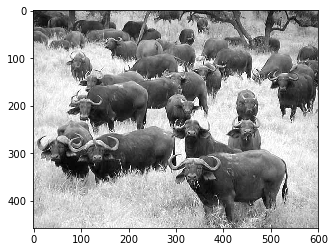

In [40]:
img = imread(r'bizon.jpg')[:,:,0]# матрица интенсивностей
plt.gray()
imgplot = plt.imshow(img)
plt.show()

**8. (1 балл)** Постройте сингулярное разложение этой матрицы (не центрируя данные). 

In [42]:
u, s, vh = np.linalg.svd(img)
u.shape, s.shape, vh.shape

((458, 458), (458,), (600, 600))

**9. (1 балл)** Визуализуйте первую главную компоненту. Что получилось? Почему?

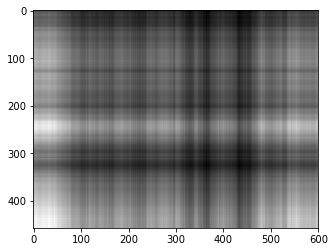

In [43]:
from numpy.linalg import svd
u, s, v = svd(img)
comp = 1 #берем только первую компоненту
plt.imshow(np.dot(u[:,0:comp], np.dot(np.diag(s[0:comp]), v[0:comp,:])), cmap='gray')

Картинку практически не видно, т.к. одной главной компоненты не хватает для адекватного воспроизведения информации.

**10. (0.5 балл)** Визуализуйте компоненты с первой по двадцатую, с первой по пятидесятую, с двадцатой по сотую, с двадцатой по последнюю. Что получилось и почему?
Сколько первых компонент нужно взять для достаточно хорошего восстановления исходного изображения?

In [44]:
len(u)

458

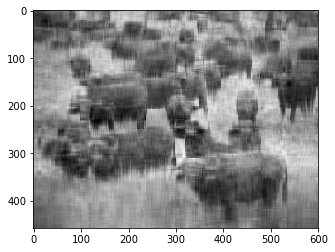

In [45]:
plt.imshow(np.dot(u[:,1:20], np.dot(np.diag(s[1:20]), v[1:20,:])), cmap='gray') # с 1 по 20

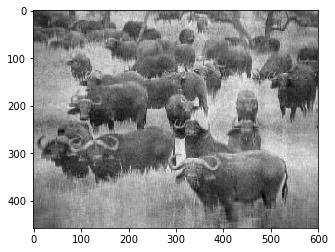

In [46]:
plt.imshow(np.dot(u[:,1:50], np.dot(np.diag(s[1:50]), v[1:50,:])), cmap='gray') # с 1 по 50

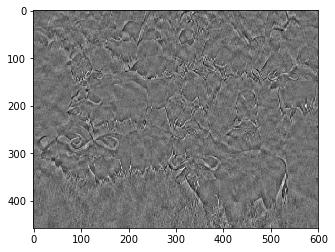

In [47]:
plt.imshow(np.dot(u[:,20:100], np.dot(np.diag(s[20:100]), v[20:100,:])), cmap='gray') # с 20 по сотую

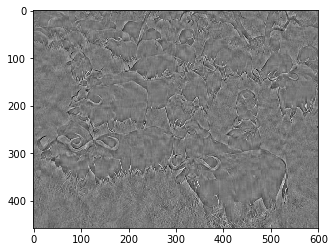

In [48]:
plt.imshow(np.dot(u[:,20:458], np.dot(np.diag(s[20:458]), v[20:458,:])), cmap='gray') # с 20 по последнюю

Как несложно заметить, в первых главных компонентах содержится больше информации. Для того, чтобы ответить какое количество компонент надо взять, можно обратиться к графику объясненной дисперсии.

In [49]:
pca = sklearn.decomposition.PCA()
pca.fit(img)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

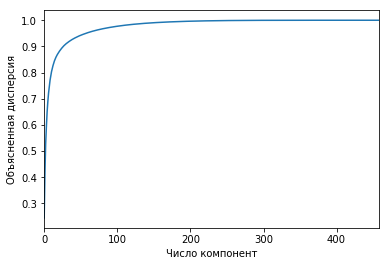

In [51]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlim((0, 458))
plt.xlabel('Число компонент')
plt.ylabel('Объясненная дисперсия')

Как мы видим, после 100-й компоненты информации в каждой содержится не так много. Приблизим график.

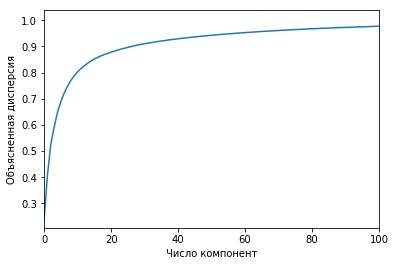

In [52]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlim((0, 100))
plt.xlabel('Число компонент')
plt.ylabel('Объясненная дисперсия')

Возьмем первые 100 компонент - лучший рез. Больше всего информации хранится в первых компонентах

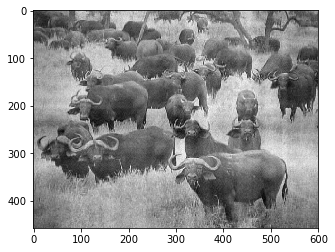

In [53]:
plt.imshow(np.dot(u[:,1:100], np.dot(np.diag(s[1:100]), v[1:100,:])), cmap='gray') # с 1 по 100

**11. (0.5 балл)** Как изменится результат, если сначала вы центрируете данные?

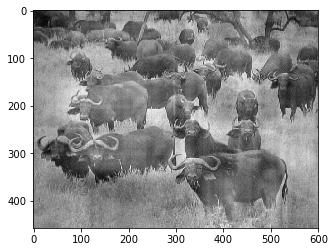

In [55]:
img = img - np.mean(img, axis = 0) # центрируем данные
u, s, v = svd(img)
plt.imshow(np.dot(u[:,1:100], np.dot(np.diag(s[1:100]), v[1:100,:])), cmap='gray') # с 1 по 100

Почти ничего не изменилось, т.к. метод SVD уже предполагает центрирование по своей сути.